<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: Welcome & Objectives

In [1]:
print("Welcome to Week 8!")
print("This week, you'll:")
print("- Understand the idea behind Gradient Boosting")
print("- Implement a boosting model using sklearn")
print("- Train a more optimized version with XGBoost")
print("- Compare performance against Random Forests and KNN")

Welcome to Week 8!
This week, you'll:
- Understand the idea behind Gradient Boosting
- Implement a boosting model using sklearn
- Train a more optimized version with XGBoost
- Compare performance against Random Forests and KNN


# **SECTION 2: What is Boosting?**

### What is Boosting?

Boosting combines **multiple weak learners** (usually shallow decision trees) into a **stronger model**.

- Each new model focuses on the **mistakes** of the previous one.
- Models are added **sequentially** to correct errors step-by-step.

➡️ Think of it as a relay team: each member picks up where the last one struggled.

# **SECTION 3: Load Dataset – Reuse SMS Spam Example**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤝 Week 8 – Gradient Boosting & XGBoost

---

### 🚨 Why Not Just Use Random Forests?

- Random Forests are **ensemble models** that aggregate decisions from multiple trees.
- But what if we could make our models **more accurate** by iteratively correcting errors?

➡️ **Boosting** works by **sequentially** focusing on **misclassified points** and improving over time.

---

## 📍 Enter Gradient Boosting

### 🌟 Core Idea:
- **Boosting** combines **weak learners** (typically shallow decision trees) into a **stronger model**.
- Each model added corrects the **errors** of the previous one.

> Boosting is like **training** a group of individuals, where each member **learns from the previous one's mistakes**.

---

### 🧮 How It Works

1. Train the first model.
2. Look at **mistakes** (misclassified points).
3. Train the next model focusing on those mistakes.
4. Combine them together to make a strong final model.

---

# **SECTION 4: Train Gradient Boosting Model**

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [6]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [7]:
print("--- Gradient Boosting ---")
print(classification_report(y_test, y_pred_gb))

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115




### 📐 Gradient Boosting vs XGBoost

- **Gradient Boosting** is a simple, sequential approach.
- **XGBoost** is an optimized, regularized version of Gradient Boosting that focuses on:
  - **Speed**
  - **Regularization** to prevent overfitting
  - **Handling missing data** more efficiently

---

### 🤔 Hyperparameters to Tune

- `n_estimators`: Number of trees in the model.
- `learning_rate`: Controls how much each model is weighted.
- `max_depth`: Controls the complexity of the trees.

---

# S**ECTION 5: Add XGBoost**

In [8]:
import xgboost as xgb

In [9]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
print("--- XGBoost ---")
print(classification_report(y_test, y_pred_xgb))

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## 📊 Model Evaluation – Same Toolkit

We use:
- **Confusion Matrix**
- **Precision, Recall, F1**
- **ROC Curve + AUC**

These tools help us understand how well our boosting models are performing.

---

# **SECTION 6: Evaluation – Confusion Matrix & ROC**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## Gradient Boosting Confusion Matrix

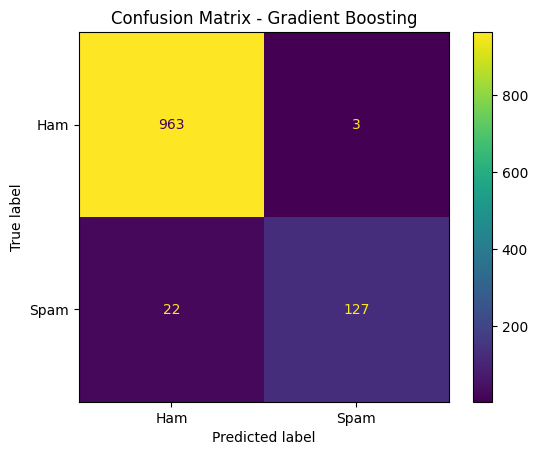

In [12]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm_gb, display_labels=['Ham', 'Spam']).plot()
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

## XGBoost Confusion Matrix

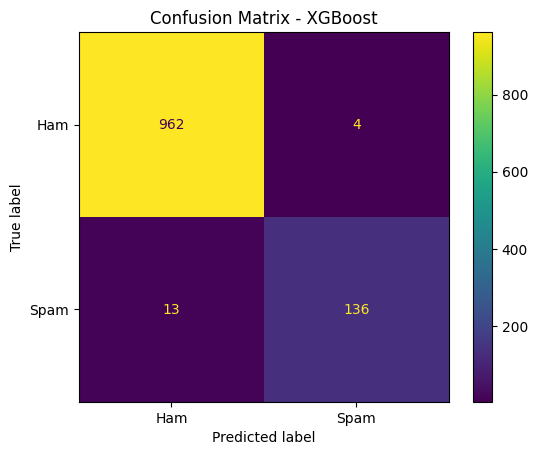

In [13]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=['Ham', 'Spam']).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

## ROC Curve Comparison

In [14]:
y_probs_gb = gb.predict_proba(X_test)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [15]:
auc_gb = roc_auc_score(y_test, y_probs_gb)
auc_xgb = roc_auc_score(y_test, y_probs_xgb)

In [16]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)

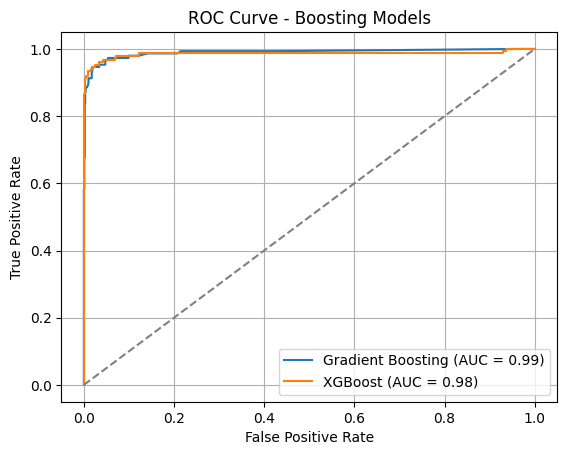

In [17]:
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Boosting Models")
plt.legend()
plt.grid(True)
plt.show()

### 🧠 TL;DR

| Model              | Strengths                         | Weaknesses                   |
|--------------------|------------------------------------|-------------------------------|
| Logistic Regression| Simple, fast                      | Assumes linear boundaries     |
| Decision Trees     | Non-linear, interpretable         | Overfits easily               |
| Random Forest      | Robust, strong ensemble           | Slower, harder to explain     |
| Gradient Boosting  | Accurate, focuses on mistakes     | Sensitive to noisy data       |
| XGBoost            | Faster, better regularized        | Requires more tuning         |

---

You now know how **Boosting** iteratively improves models by correcting errors.  
Next week, we’ll dive into **model evaluation techniques** to better assess our models on real-world tasks! 🔍

# **🧠 SECTION 7: What’s Coming Next?**

### What’s Next in Week 9?

Boosting gave us another way to **combine multiple weak models** for better results.  
But how do we **evaluate** models effectively, especially on imbalanced datasets?

➡️ Next week, we dive into **Model Evaluation Techniques**:  
Precision, Recall, F1, ROC, PR curves — and when to use what 🔍

# **🏋️‍♀️ Exercises**

### Exercises:
1. Try different `learning_rate` values like 0.05 or 0.2 in Gradient Boosting.
2. Use fewer/more `n_estimators` and observe performance changes.
3. Try `early_stopping_rounds` with XGBoost for faster training.
4. Add text preprocessing: lowercase, remove stopwords, etc.